# **Exploring Zipcode 22030 and Its Nearby Venues to Determine Location to Open A Gym**

## **Introduction**

A client would like to open a gym in Fairfax city, Virginia. He would like to determine which area is the most favorable to open a gym. He knows that there are gyms already in Fairfax city and would like to compete with them. He would like to have an out-of-the-box location that helps him compete with other gyms.

## **Data**

There are no available data for neighborhoods in Fairfax city so Foursquare will be used to retrieve 100 venues of the area, their latitudes, and their longitudes. These venues then will be clustered based on their locations (latitudes and longitudes) to determine crowded locations that are popular in the city. These clusters are possible locations for the gym to be opened. After that, the top 10 common venues for each cluster will be computed to see which one is the most favorable for my client to open a gym. Also, to visualize the 22030 zip code, I modified Fairfax County Zip Codes geojson file using geojson.io to only includes 22030. The geojson file will be named map22030.geojson.

## **Data Collection**

**Downloading dependencies that I will need for this project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import requests
!pip install folium
import folium

**Creating map of Toronto using latitude and longitude values**

The geograpical coordinates of Fairfax 22030 is 38.84,-77.34 based on the site https://www.unitedstateszipcodes.org/22030/. Let's use folium with our map22030.geojson file to map out the location.

In [4]:
fairfax_latitude = 38.84
fairfax_longitude = -77.34
map_22030 = folium.Map(location=[fairfax_latitude,fairfax_longitude], zoom_start=13)
map_22030.choropleth(geo_data='map22030.geojson',
                     fill_color='green', fill_opacity=0.5, line_opacity=0.2
                    )
folium.Marker([fairfax_latitude,fairfax_longitude]).add_to(map_22030)
map_22030

**Foursquare API**

Use Foursquare API to retrieve 100 venues within the radius of 6000 meters.

In [7]:
CLIENT_ID = 'MJ3C5ORNTCXAEOLTRZ4VW0PUIMS0YLQD4ASUHXUQEWTJXWEI' # your Foursquare ID
CLIENT_SECRET = 'BFJHL0NCJDISSKHSX40AD2AZ2ZJAQUQPJAUCLMJXYSZYTKPU' # your Foursquare Secret
VERSION = '20200115' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 100
radius = 6000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    fairfax_latitude, 
    fairfax_longitude, 
    radius, 
    LIMIT)
url

Your credentails:
CLIENT_ID: MJ3C5ORNTCXAEOLTRZ4VW0PUIMS0YLQD4ASUHXUQEWTJXWEI
CLIENT_SECRET:BFJHL0NCJDISSKHSX40AD2AZ2ZJAQUQPJAUCLMJXYSZYTKPU


'https://api.foursquare.com/v2/venues/explore?&client_id=MJ3C5ORNTCXAEOLTRZ4VW0PUIMS0YLQD4ASUHXUQEWTJXWEI&client_secret=BFJHL0NCJDISSKHSX40AD2AZ2ZJAQUQPJAUCLMJXYSZYTKPU&v=20200115&ll=38.84,-77.34&radius=6000&limit=100'

In [9]:
import requests
from pandas.io.json import json_normalize 
results = requests.get(url).json()

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.location.crossStreet,venue.venuePage.id,venue.events.count,venue.events.summary
0,e-0-4a7eccf6f964a52020f21fe3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4a7eccf6f964a52020f21fe3,Wegmans,11620 Monument Dr,38.851318,-77.347595,"[{'label': 'display', 'lat': 38.85131817230798...",1421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-4bad3e94f964a520683d3be3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bad3e94f964a520683d3be3,Pad Thai,11199 Lee Hwy,38.851300,-77.332860,"[{'label': 'display', 'lat': 38.85129989253346...",1401,...,1319493,https://www.grubhub.com/restaurant/pad-thai-re...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN,NaN
2,e-0-4b340d26f964a5206a2425e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b340d26f964a5206a2425e3,Arigato Sushi Japanese Restaurant,11199 Lee Hwy,38.851485,-77.332683,"[{'label': 'display', 'lat': 38.85148499411693...",1427,...,1315185,https://www.grubhub.com/restaurant/arigato-sus...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN,NaN
3,e-0-5bd5f0b32be425002c9e5d8b-3,0,"[{'summary': 'This spot is popular', 'type': '...",5bd5f0b32be425002c9e5d8b,Simply Social Coffee,11282 James Swart Cir,38.854951,-77.334554,"[{'label': 'display', 'lat': 38.85495066293936...",1729,...,1507485,https://www.grubhub.com/restaurant/simply-soci...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN,NaN
4,e-0-541324c5498eaffcc8e49783-4,0,"[{'summary': 'This spot is popular', 'type': '...",541324c5498eaffcc8e49783,Chuy's Fairfax,11219 Lee Hwy,38.850999,-77.334739,"[{'label': 'display', 'lat': 38.85099934814141...",1306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-504934c3e4b08c4804f96916-95,0,"[{'summary': 'This spot is popular', 'type': '...",504934c3e4b08c4804f96916,The Cheese Grille,NaN,38.857911,-77.377458,"[{'label': 'display', 'lat': 38.85791055674061...",3810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,e-0-462782e1f964a520c5451fe3-96,0,"[{'summary': 'This spot is popular', 'type': '...",462782e1f964a520c5451fe3,The Auld Shebeen,3971 Chain Bridge Rd,38.846982,-77.306184,"[{'label': 'display', 'lat': 38.84698231297175...",3033,...,340683,https://www.grubhub.com/restaurant/the-auld-sh...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,at North St.,97542847,NaN,NaN
97,e-0-4be586e1bcef2d7fffe003e5-97,0,"[{'summary': 'This spot is popular', 'type': '...",4be586e1bcef2d7fffe003e5,Divine Nail Spa,3903 Fair Ridge Dr,38.873067,-77.373369,"[{'label': 'display', 'lat': 38.87306652137919...",4681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,e-0-523b46de11d2e4f79cf88cf3-98,0,"[{'summary': 'This spot is popular', 'type': '...",523b46de11d2e4f79cf88cf3,Chick-fil-A,4516 Fair Knoll Dr,38.862358,-77.387586,"[{'label': 'display', 'lat': 38.8623575, 'lng'...",4817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.delivery.id', 'venue.delivery.url',
       'venue.delivery.provider.name', 'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes',
       'venue.delivery.provider.icon.name', 'venue.location.crossStreet',
       'venue.venuePage.id', 'venue.events.count', 'venue.events.summary'],
      dtype='object')

In [24]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.postalCode']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [25]:
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng','postalCode'])

In [26]:
foursquare_venues = pd.concat([foursquare_venues, nearby_venues], axis = 0, sort = False)
foursquare_venues

,name,categories,lat,lng,postalCode
0,Wegmans,Supermarket,38.851318,-77.347595,22030
1,Pad Thai,Thai Restaurant,38.851300,-77.332860,22030
2,Arigato Sushi Japanese Restaurant,Sushi Restaurant,38.851485,-77.332683,22030
3,Simply Social Coffee,Coffee Shop,38.854951,-77.334554,22030
4,Chuy's Fairfax,Mexican Restaurant,38.850999,-77.334739,22030
...,...,...,...,...,...
95,The Cheese Grille,Bar,38.857911,-77.377458,22033
96,The Auld Shebeen,Pub,38.846982,-77.306184,22030
97,Divine Nail Spa,Cosmetics Shop,38.873067,-77.373369,22033
98,Chick-fil-A,Fast Food Restaurant,38.862358,-77.387586,22033


## **Visualizing the venues**

Let's visualize 100 venues from the latitude and longitude of 22030 zip code.

In [18]:
map_22030 = folium.Map(location=[fairfax_latitude,fairfax_longitude], zoom_start=13)
map_22030.choropleth(geo_data='map22030.geojson',
                     fill_color='yellow', fill_opacity=0.4, line_opacity=0.2
                    )
folium.Marker([fairfax_latitude,fairfax_longitude]).add_to(map_22030)
folium.Circle([fairfax_latitude, fairfax_longitude],
              radius=6000,
              color="#007849"
             ).add_to(map_22030)

for name, latitude, longitude in zip(foursquare_venues['name'],foursquare_venues['lat'],foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    popup=label,
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_22030)
map_22030

## **Analysis**

We can use the elbow method to determine the k values that best for this clustering.

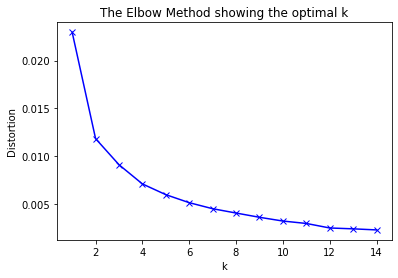

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,davies_bouldin_score,v_measure_score
# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 0).fit(foursquare_venues[['lat','lng']])
    preds = kmeanModel.predict(foursquare_venues[['lat','lng']])
    distortions.append(sum(np.min(cdist(foursquare_venues[['lat','lng']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / foursquare_venues[['lat','lng']].shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Based on the plot above, we can choose k = 4.

In [27]:
from sklearn.cluster import KMeans
k = 4
kMeans_geo = KMeans(n_clusters = k, random_state = 0).fit(foursquare_venues[['lat','lng']])
foursquare_venues.insert(0, 'cluster_geo', kMeans_geo.labels_)

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_22030 = folium.Map(location=[fairfax_latitude,fairfax_longitude], zoom_start=13)
map_22030.choropleth(geo_data='map22030.geojson',
                     fill_color='#31a354', fill_opacity=0.4, line_opacity=0.4
                    )
folium.Marker([fairfax_latitude,fairfax_longitude]).add_to(map_22030)
folium.Circle([fairfax_latitude, fairfax_longitude],
              radius=6000,
              color="#007849"
             ).add_to(map_22030)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for name, lat, lon,cluster in zip(foursquare_venues['name'],foursquare_venues['lat'],foursquare_venues['lng'],foursquare_venues['cluster_geo']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-4],
        fill=True,
        fill_color=rainbow[cluster-4],
        fill_opacity=0.7).add_to(map_22030)   
map_22030       

In [21]:
foursquare_venues

,cluster_geo,name,categories,lat,lng,postalCode
0,1,Wegmans,Supermarket,38.851318,-77.347595,22030
1,2,Pad Thai,Thai Restaurant,38.851300,-77.332860,22030
2,2,Arigato Sushi Japanese Restaurant,Sushi Restaurant,38.851485,-77.332683,22030
3,2,Simply Social Coffee,Coffee Shop,38.854951,-77.334554,22030
4,2,Chuy's Fairfax,Mexican Restaurant,38.850999,-77.334739,22030
...,...,...,...,...,...,...
95,3,The Cheese Grille,Bar,38.857911,-77.377458,22033
96,0,The Auld Shebeen,Pub,38.846982,-77.306184,22030
97,3,Divine Nail Spa,Cosmetics Shop,38.873067,-77.373369,22033
98,3,Chick-fil-A,Fast Food Restaurant,38.862358,-77.387586,22033


Next, let's encode and group rows by cluster_geo and by taking the mean of the frequency of occurrence of each category

In [29]:
# one hot encoding
fairfax_onehot = pd.get_dummies(foursquare_venues[['categories']], prefix="", prefix_sep="")
fairfax_onehot

fairfax_onehot['cluster_geo'] = foursquare_venues['cluster_geo']
fairfax_onehot['cluster_geo']
geo = fairfax_onehot['cluster_geo']
fairfax_onehot.drop(labels=['cluster_geo'], axis=1,inplace = True)
fairfax_onehot.insert(0, 'cluster_geo', geo)
fairfax_onehot.head()

,cluster_geo,American Restaurant,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Garden,Bike Shop,Bookstore,Brazilian Restaurant,...,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
fairfax_grouped = fairfax_onehot.groupby('cluster_geo').mean().reset_index()
fairfax_grouped.head()

,cluster_geo,American Restaurant,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Garden,Bike Shop,Bookstore,Brazilian Restaurant,...,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint
0,0,0.050000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,...,0.05,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.05,0.000000
1,1,0.029412,0.029412,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,...,0.00,0.029412,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,2,0.000000,0.000000,0.035714,0.000000,0.00,0.000000,0.035714,0.000000,0.000000,...,0.00,0.000000,0.071429,0.035714,0.035714,0.035714,0.035714,0.000000,0.00,0.035714
3,3,0.000000,0.000000,0.000000,0.055556,0.00,0.055556,0.000000,0.055556,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.00,0.000000


In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['cluster_geo']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['cluster_geo'] = fairfax_grouped['cluster_geo']

for ind in np.arange(fairfax_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(fairfax_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,cluster_geo,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Comic Shop,Indian Restaurant,Record Shop,Beer Bar,Café,College Gym,Deli / Bodega,Donut Shop,Golf Course,Greek Restaurant
1,1,Ice Cream Shop,Mexican Restaurant,Italian Restaurant,Coffee Shop,Cosmetics Shop,Shopping Mall,Indian Restaurant,Movie Theater,Mediterranean Restaurant,Kitchen Supply Store
2,2,Mexican Restaurant,Coffee Shop,Supermarket,Café,Gym,Mediterranean Restaurant,Middle Eastern Restaurant,Music Store,Organic Grocery,Italian Restaurant
3,3,Deli / Bodega,Coffee Shop,Burger Joint,Gym,Grocery Store,Garden Center,Food Court,Fast Food Restaurant,Diner,Cosmetics Shop


## **Results and Discussion**

Based on the generated table, area of cluster 1 maybe the best place for my client to open a gym. Cluster 1 is the area where there are 2 shopping malls. Thus, we can see that the common venues of cluster 1 are mainly restaurants, shops, and theaters. People naturally got attracted by those venues because they are the places for them to relax. They are likely to go there with happy mood and no precautions. After enjoying their meals and other actitives, they see the gym and they may feel guilty because of the unhealthy meals and decide to go to the gym. The gym is right next to the shopping malls so we hope that people will go there right after having meals and shopping.
For clusters 2 and 3, we can see that those are the living areas where coffee shop, supermarket, and deli/bodega are popular. People in those areas will cook meals at home. They will more likely to eat healthier meals then when they go out. Therefore, they will not feel motivated to go out to the gym as much as the ones whose feel guilty because of having unhealthy meals.
Cluster 0 has George Mason University which already has their own gyms. it may have promotions for its students so it is not a good idea to open a gym and compete there.

## **Conclusion**

We are able to determine a posible location to open a gym in Fairfax City, Virginia. However, more researchs should be performed to test the hypothesis that we stated in the discussion section to determine the best specific location to open the gym.